In [1]:
import sys
import numpy as np
import pandas as pd
import csv

In [2]:
train_path = "./data/train.csv"
test_path = "./data/test.csv"
ans_path = "./data/ans.csv"

In [3]:
train_raw = pd.read_csv(train_path, sep=',', encoding='big5')
test_data = pd.read_csv(test_path, sep=',', encoding='big5', names=['id','index','1','2','3','4','5','6','7','8','9'])

In [4]:
train_1 = train_raw.iloc[:, 3:3+10]
train_2 = train_raw.iloc[:, 16:16+10]
attr_index = train_raw.iloc[:, 2]

In [5]:
train_1 = pd.concat([train_1, attr_index], axis=1)
train_2 = pd.concat([train_2, attr_index], axis=1)

In [6]:
y_1 = train_1[train_1["測項"] == "PM2.5"]
y_2 = train_2[train_2["測項"] == "PM2.5"]
x_1 = y_1.iloc[:, 0:9].values.astype('float64')
x_2 = y_2.iloc[:, 0:9].values.astype('float64')
X = np.concatenate((x_1, x_2), axis=0)
tmp = np.ones(X.shape[0])
X = np.c_[tmp, X]
del tmp
y_1 = y_1['9'].values
y_2 = y_2['22'].values
Y = np.concatenate((y_1, y_2), axis=0)
Y = Y.astype('float64')
Y = Y[:,np.newaxis]

In [7]:
x_test = test_data[test_data['index']=='PM2.5']
x_test = x_test.iloc[:, 2:].values.astype('float64')
tmp = np.ones(x_test.shape[0])
x_test = np.c_[tmp, x_test]
del tmp

In [8]:
y_test = pd.read_csv(ans_path, sep=',')
y_test = y_test['value'].values.astype('float64')
y_test = y_test[:, np.newaxis]

In [9]:
# 引入正则项
from sklearn.linear_model import Ridge
lambda_his = [0.1, 0.01, 0.001, 0.0001]
rmse_his = []
for lam in lambda_his:
    clf = Ridge(alpha=lam)
    clf.fit(X, Y)
    y_test_pre = clf.predict(x_test)
    rmse_his.append(np.sqrt(((y_test - y_test_pre)**2).sum() / len(y_test)))

/home/ddrh/Software/python_venv/general/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ddrh/Software/python_venv/general/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


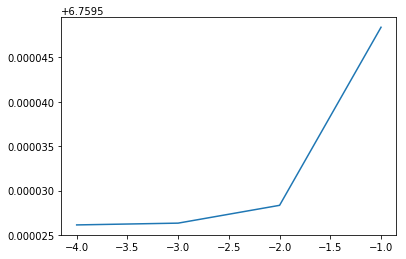

In [11]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(np.log10(lambda_his), rmse_his)
plt.show()